In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import pennylane as qml
import torch
import numpy as np

In [3]:
qml.__version__

'0.8.0-dev'

In [4]:
import builtins
import time

In [7]:
#builtins.dev_qubit  = qml.device('qiskit.aer', wires=6,shots=200)
#builtins.dev_qubit  = qml.device('qiskit.aer', wires=6)
#builtins.dev_qubit  = qml.device('default.qubit', wires=8)
builtins.dev_qubit  = qml.device('expt.tensornet.tf', wires=8)

ImportError: expt.tensornet device requires TensorNetwork>=0.2

In [6]:
from modules.QCircuitNet_4eg import QCircuitNet_4eg

In [7]:
model=QCircuitNet_4eg()

Parameter containing:
tensor([0.8585, 0.5957, 0.9620, 0.7512, 0.2985, 0.9643, 0.4131, 0.2768, 0.0665,
        0.9416, 0.8151, 0.0531], requires_grad=True)


In [8]:
from utils.data_handling import simple_np_ds

In [9]:
dset=simple_np_ds("../data/moons_nonoise_normalised.npz",val_split=0.2,test_split=0.2)

In [10]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1
config.batch_size_train = 4
config.batch_size_val = 1
config.num_val_samples=20
config.num_train_ensembles=16
config.lr=0.005
config.device = 'cpu'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2
config.dump_path = '../model_state_dumps'

In [11]:
from modules.engine import Engine

In [12]:
engine=Engine(model,dset,config)

Sticking to CPU
Creating a directory for run dump: ../model_state_dumps/20191126_105659/


In [ ]:
%%time
engine.train(epochs=20,report_interval=1,valid_interval=50)

Epoch 0 Starting @ 2019-11-26 10:57:03
starting over on the training set
starting over on the training set
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.363
Saved checkpoint as: ../model_state_dumps/20191126_105659/QCircuitNet_4eg.pth
best validation loss so far!: 1.362587633728981
Saved checkpoint as: ../model_state_dumps/20191126_105659/QCircuitNet_4egBEST.pth
... Iteration 1 ... Epoch 0.01 ... Loss 1.747
... Iteration 2 ... Epoch 0.02 ... Loss 1.000
... Iteration 3 ... Epoch 0.03 ... Loss 1.568


In [14]:
from modules.plot_utils import disp_learn_hist_smoothed

In [15]:
loc=engine.dirpath

In [16]:
loc

'../model_state_dumps/20191126_091808/'

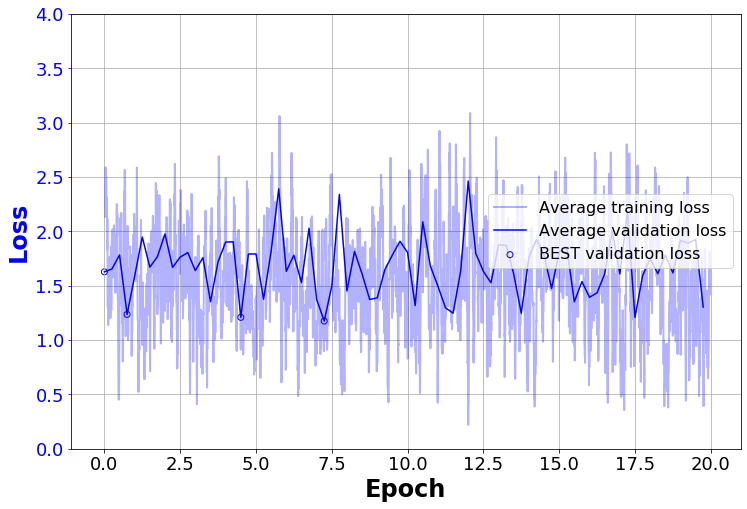

In [17]:
disp_learn_hist_smoothed(loc,window_val=1,window_train=10,losslim=4.0)